In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('job-market(3).csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columns")

#TODO: Visualize the top 10 first Rows
df.head(3)

The Dataset consists of:  40789  rows and  13  columns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN


Text(0.5, 0, 'Number of jobs')

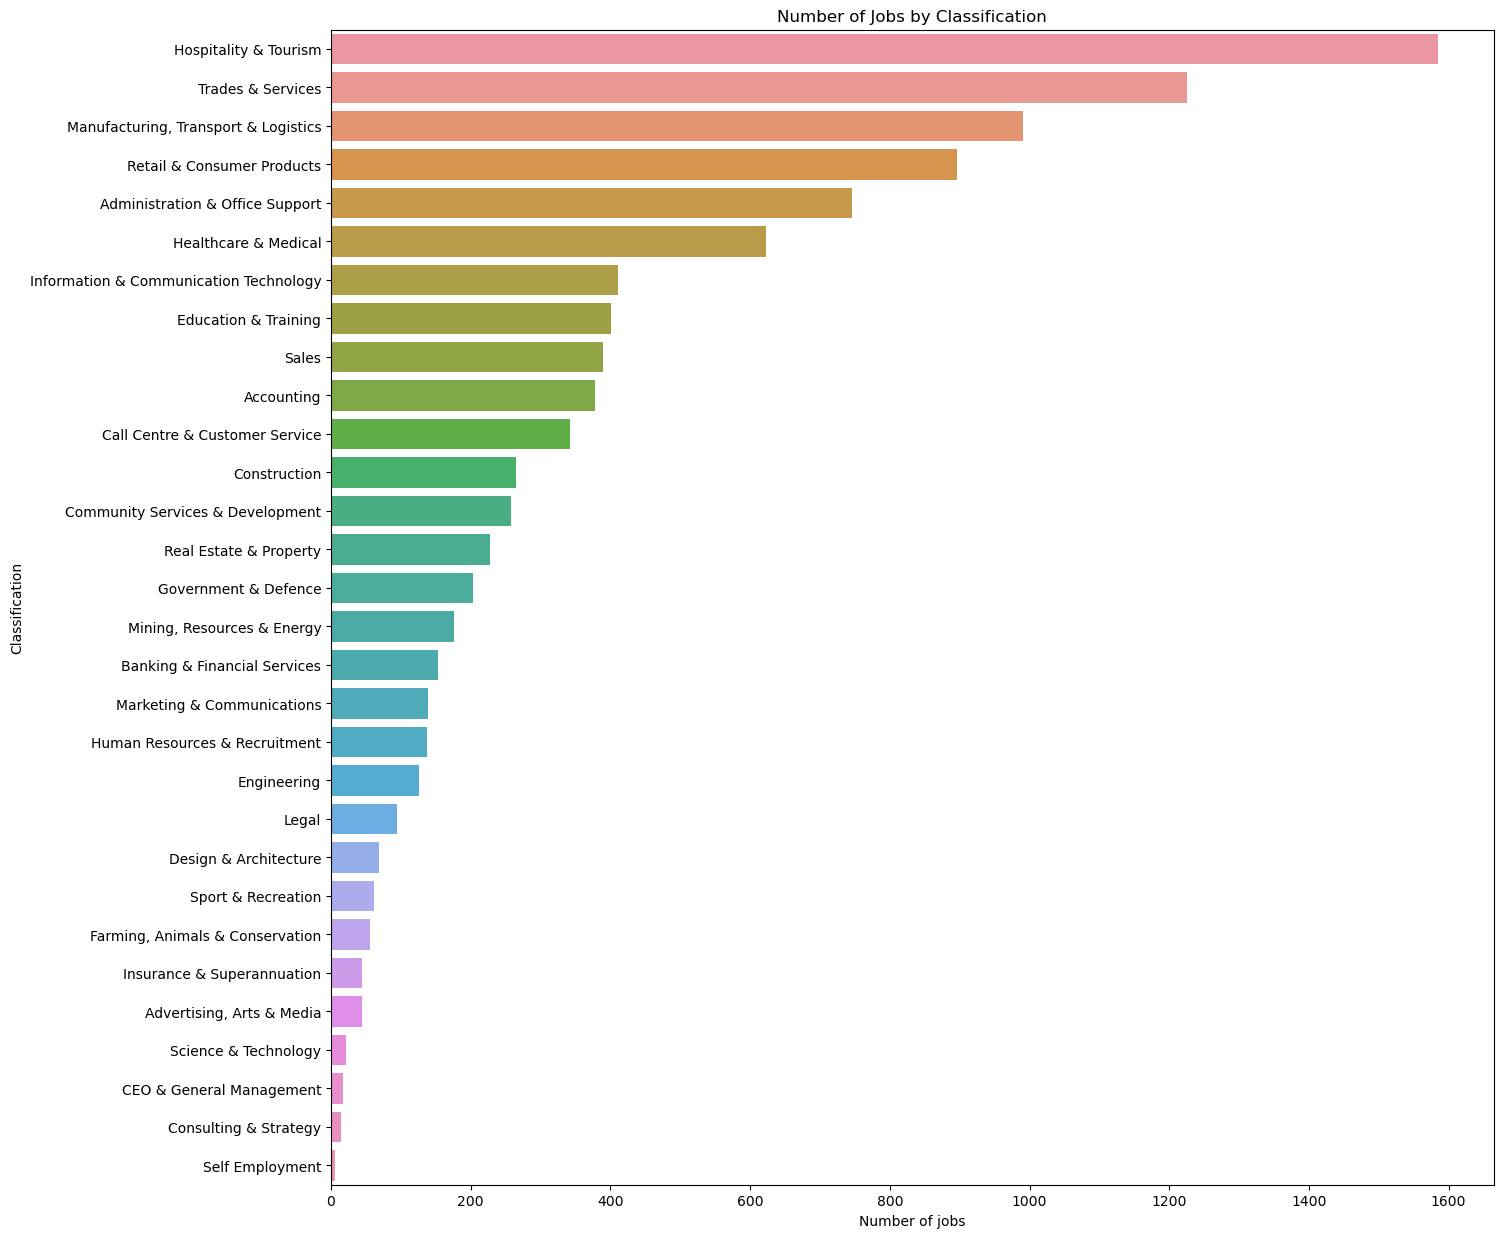

In [2]:
%matplotlib inline
plt.figure(figsize=(15,15))
axi = sns.countplot(y='Classification',data=df,order=df.Classification.value_counts().index)
plt.title('Number of Jobs by Classification')
plt.xlabel('Number of jobs')

In [3]:
import matplotlib
#create dataframe for salary ranges
df_salaryRanges = df[df['LowestSalary'].isna()==False]
df_salaryRanges = df_salaryRanges.groupby('LowestSalary').count()
df_salaryRanges['Label'] = df_salaryRanges.index
df_salaryRanges['Count'] = df_salaryRanges['Id']

df_salaryRanges.head()


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,HighestSalary,JobType,Label,Count
LowestSalary,,,,,,,,,,,,,,
0.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3740,0.0,3894
30.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1816,30.0,1842
40.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2475,40.0,2519
50.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1821,50.0,1844


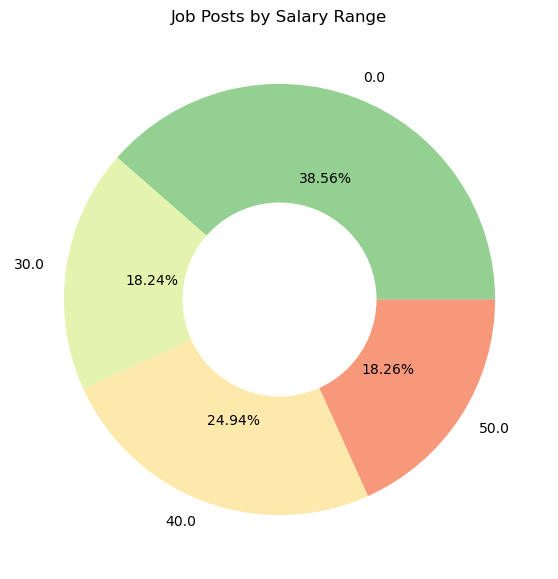

In [4]:
#salary ranges plot
fig, axi = plt.subplots(figsize=(7, 7))
axi.pie(df_salaryRanges['Count'], colors=sns.color_palette("RdYlGn_r", len(df_salaryRanges)),
        labels=df_salaryRanges['Label'], wedgeprops={'alpha': 0.7}, autopct=lambda p: '{:.2f}%'.format(p))
axi.set_title('Job Posts by Salary Range', loc='center')

# Adding a circle to make it a donut
center_circ = plt.Circle((0, 0), 0.45, color='black', fc='white', linewidth=0)
axi.add_patch(center_circ)

plt.show()

In [5]:
#OPTIONAL

locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,Albury Area,19


In [6]:
#OPTIONAL

%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm

